## DL Lab1
Activation functions & Losses

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


### Activation funcs

In [2]:

#plotting
def draw(x_val, y_val, y_der_val, func):
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(x_val, y_val, label=func)
    plt.title('Activation Function')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x_val, y_der_val, label=f'Derivative of {func}')
    plt.title('Derivative of Activation Function')
    plt.grid(True)
    plt.legend()
    plt.show()

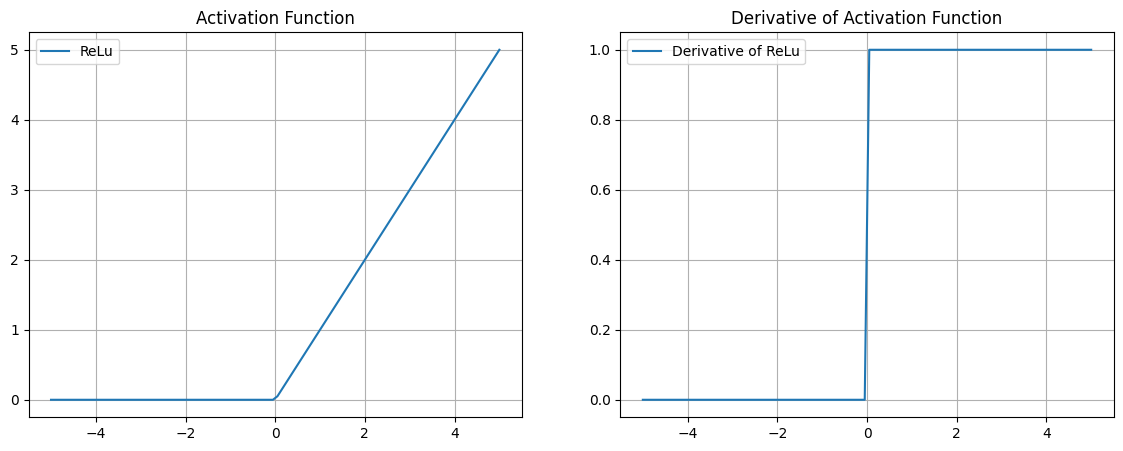

In [17]:
# ReLu

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

x_values = np.linspace(-5, 5, 100)
y_values_relu = relu(x_values)
y_values_relu_derivative = relu_derivative(x_values)

draw(x_values, y_values_relu, y_values_relu_derivative, 'ReLu')


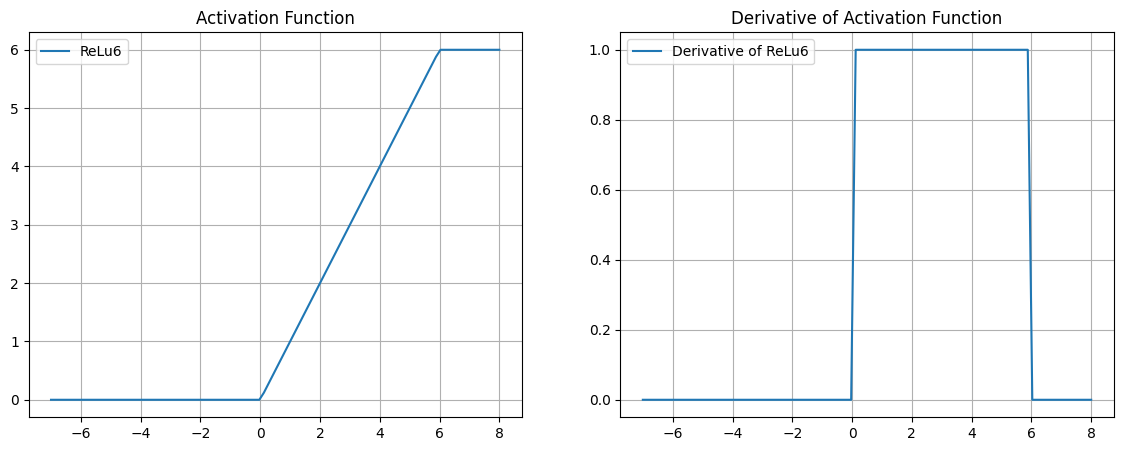

In [14]:
# ReLu6

def relu6(x):
    return np.minimum(np.maximum(0, x), 6)

def relu6_derivative(x):
    return np.where((0 < x) & (x < 6), 1, 0)

x_values = np.linspace(-7, 8, 100)
y_values_relu6 = relu6(x_values)
y_values_relu6_derivative = relu6_derivative(x_values)

draw(x_values, y_values_relu6, y_values_relu6_derivative, 'ReLu6')

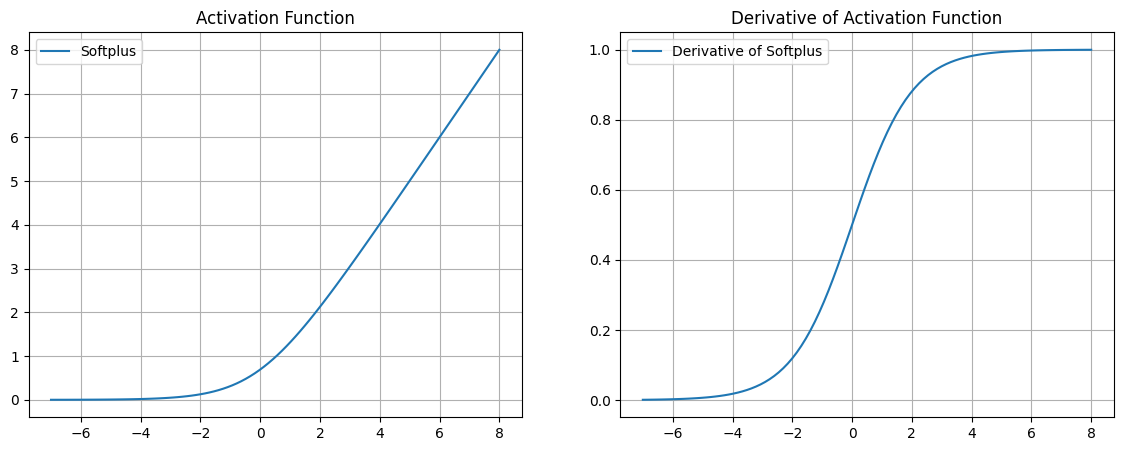

In [18]:
# Softplus

def softplus(x):
    return np.log(1 + np.exp(x))

def softplus_derivative(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-7, 8, 100)
y_values_softplus = softplus(x_values)
y_values_softplus_derivative = softplus_derivative(x_values)

draw(x_values, y_values_softplus, y_values_softplus_derivative, 'Softplus')

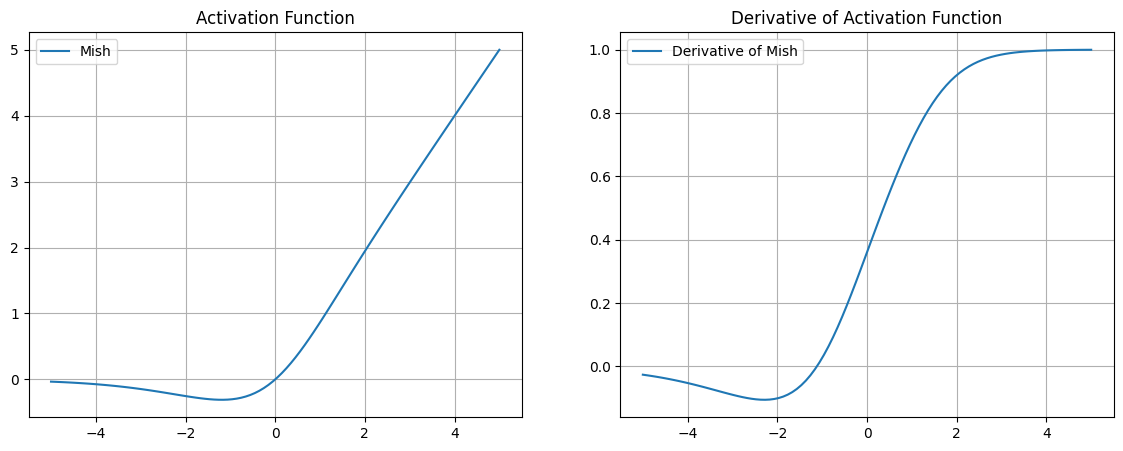

In [19]:
# Mish 

def softplus(x):
    return np.log(1 + np.exp(x))

def mish(x):
    return x * np.tanh(softplus(x))

def mish_derivative(x):
    exp_x = np.exp(x)
    exp_2x = np.exp(2 * x)
    exp_3x = np.exp(3 * x)
    num = exp_x * (4 * x + 4 * exp_2x + exp_3x + 4)
    den = (2 * exp_x + exp_2x + 2) ** 2
    return num / den

x_values = np.linspace(-5, 5, 100)
y_values_mish = mish(x_values)
y_values_mish_derivative = mish_derivative(x_values)

draw(x_values, y_values_mish, y_values_mish_derivative, 'Mish')

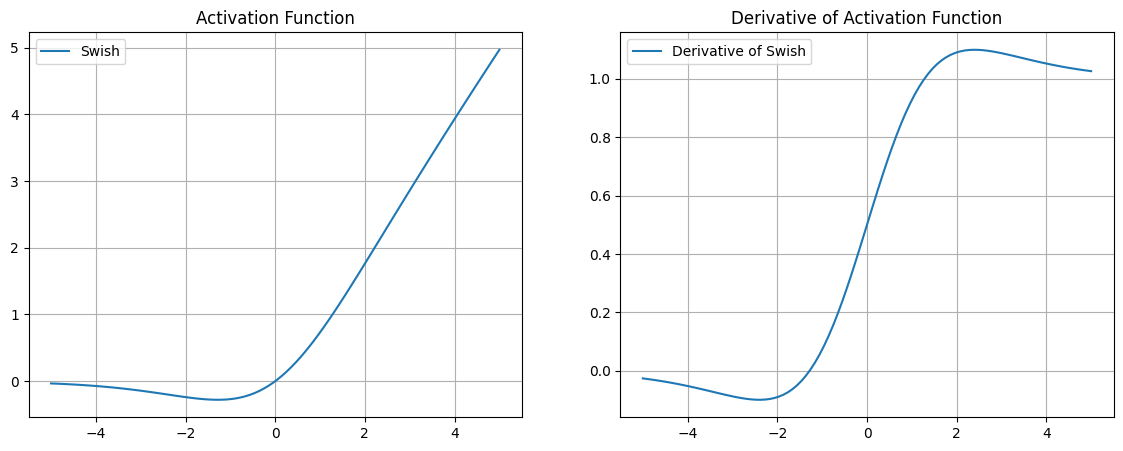

In [20]:
# Swish

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def swish(x):
    return x * sigmoid(x)

def swish_derivative(x):
    return sigmoid(x) + x * sigmoid(x) * (1 - sigmoid(x))

x_values = np.linspace(-5, 5, 100)
y_values_swish = swish(x_values)
y_values_swish_derivative = swish_derivative(x_values)

draw(x_values, y_values_swish, y_values_swish_derivative, 'Swish')

### Losses

In [8]:
# plotting

def draw_loss(y_hat_values, loss_values, loss):
    plt.plot(y_hat_values, loss_values, label=loss)
    plt.title(f'{loss} Function')
    plt.xlabel('Predicted Probability')
    plt.ylabel(loss)
    plt.legend()
    plt.grid(True)
    plt.show()

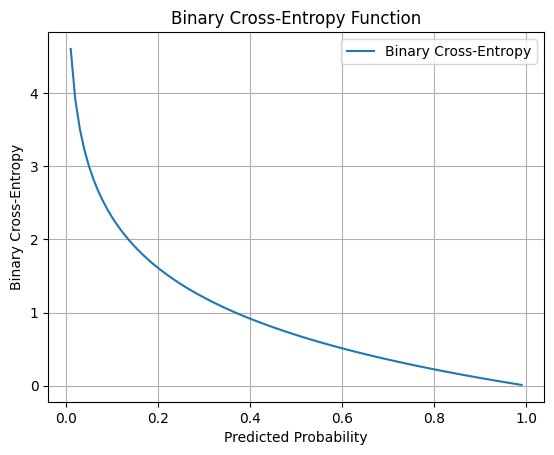

In [9]:
# BCE

def binary_cross_entropy(y, y_hat):
    return - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

y_true = 1  # True label (1 for positive class)
y_hat_values = np.linspace(0.01, 0.99, 100)  # Predicted probabilities

bce_values = binary_cross_entropy(y_true, y_hat_values)

draw_loss(y_hat_values, bce_values, 'Binary Cross-Entropy')

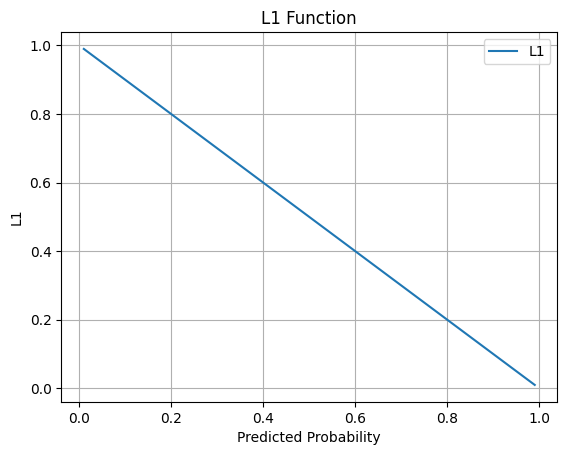

In [10]:
# L1

def l1(y, y_hat):
    return np.abs(y - y_hat)

l1_values = l1(y_true, y_hat_values)

draw_loss(y_hat_values, l1_values, 'L1')

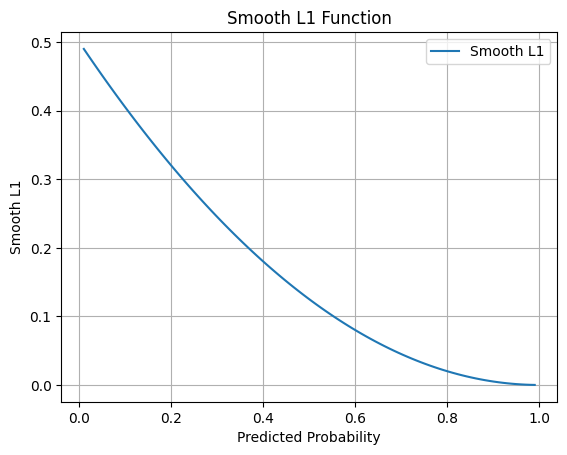

In [11]:
# Smooth L1

def smooth_l1(y, y_hat, delta=1.0):
    abs_diff = np.abs(y - y_hat)
    smooth_loss = np.where(abs_diff < delta, 0.5 * abs_diff ** 2, delta * (abs_diff - 0.5 * delta))
    return smooth_loss

smooth_l1_values = smooth_l1(y_true, y_hat_values)

draw_loss(y_hat_values, smooth_l1_values, 'Smooth L1')